<a href="https://colab.research.google.com/github/Akshay-879/cs480student/blob/main/07/Copy_of_CS480_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

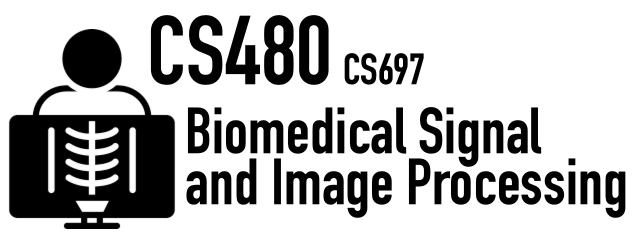
#Assignment 7

In [1]:
# In this assignment, we will explore the Imaging Data Commons,
# a new service from the National Cancer Institute.
#
# We will find and explore a PET dataset and then perform a MIP reconstruction.

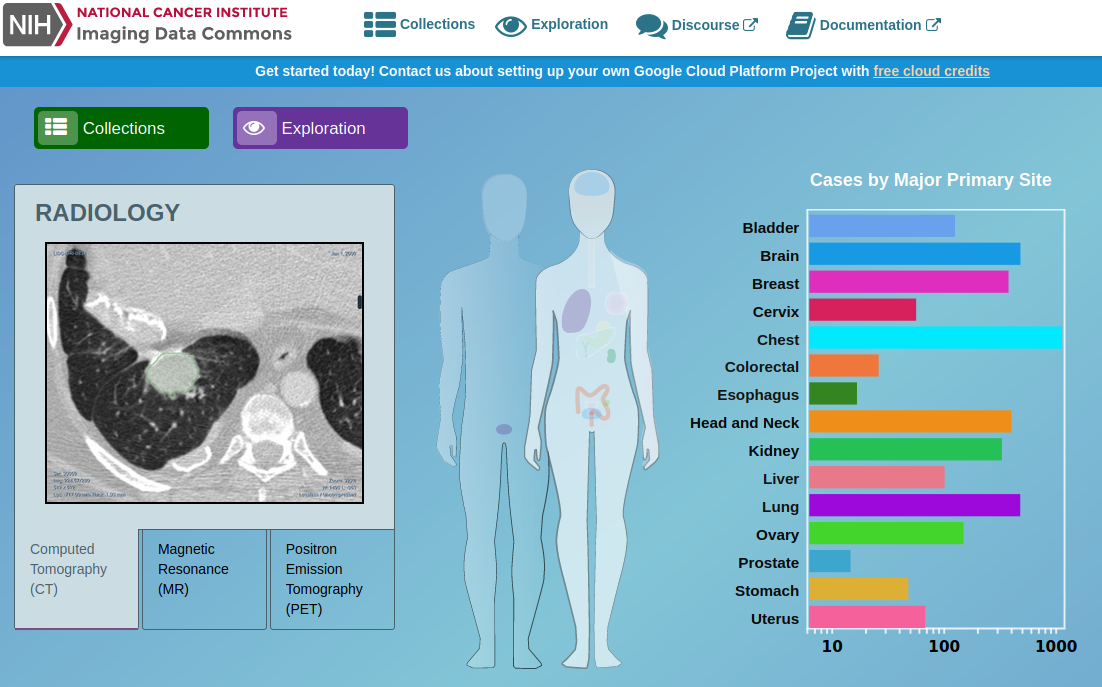

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [15 Points]

In [2]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [3]:
# TODO: Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
# 3) Paste a screenshot of the viewer after the data was loaded below.
#

TODO: Add screenshot

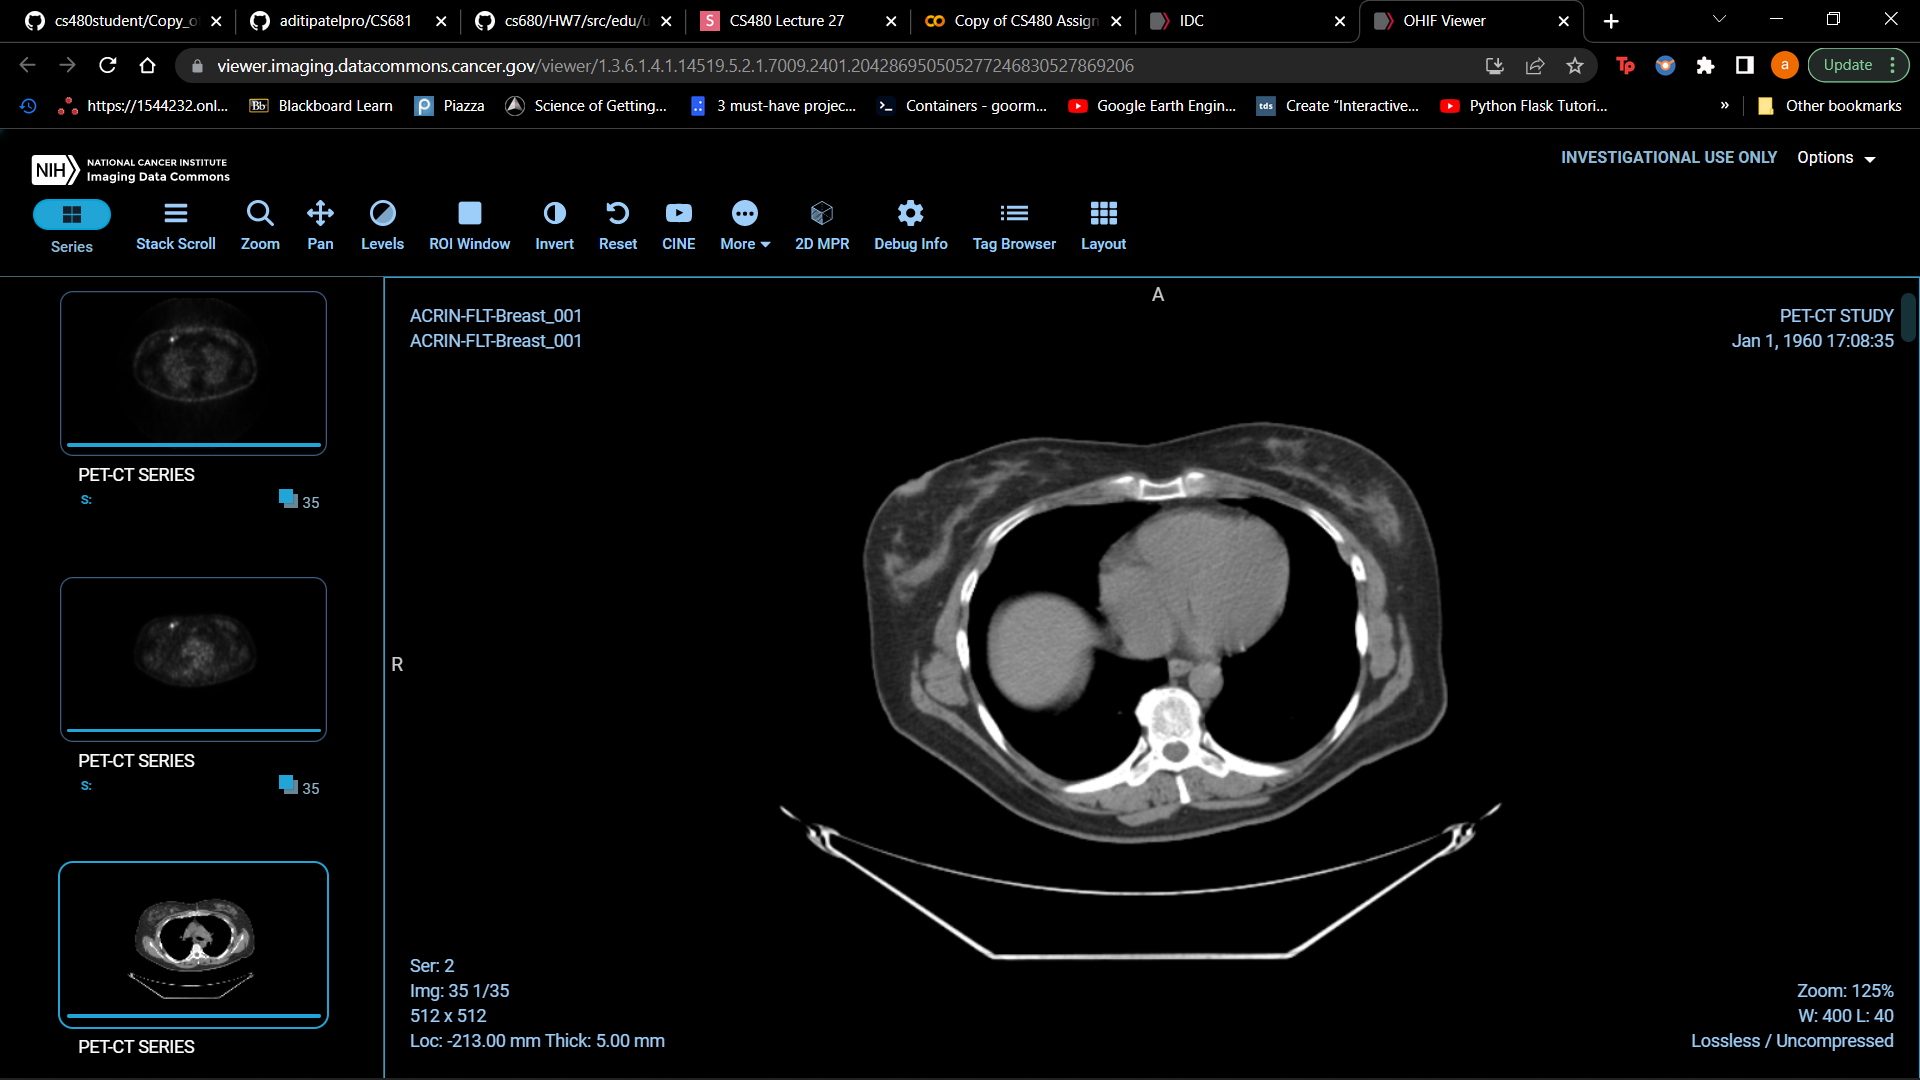

**Task 2**: Visualize structural and PET side-by-side! [30 Points]

In [4]:
# In the OHIF viewer, please change the layout to show the structural image
# next to the PET scan.
#
# TODO: Use the LAYOUT functionality in the toolbar to switch to a 2-column layout.

In [5]:
# TODO: Find the cancerous lesion.
#
# 1) Navigate through the PET image to find the cancerous lesion.

In [6]:
# TODO: Sync the structural scan (CT or MR) to the PET scan with the lesion.
#
# Hint: The "Loc" label in the bottom left of both scans should roughly match.
# Hint 2: The Levels tool allows Window/Level adjustment to increase contrast.
#

In [7]:
# TODO: Paste a screenshot showing the 2-column layout below.

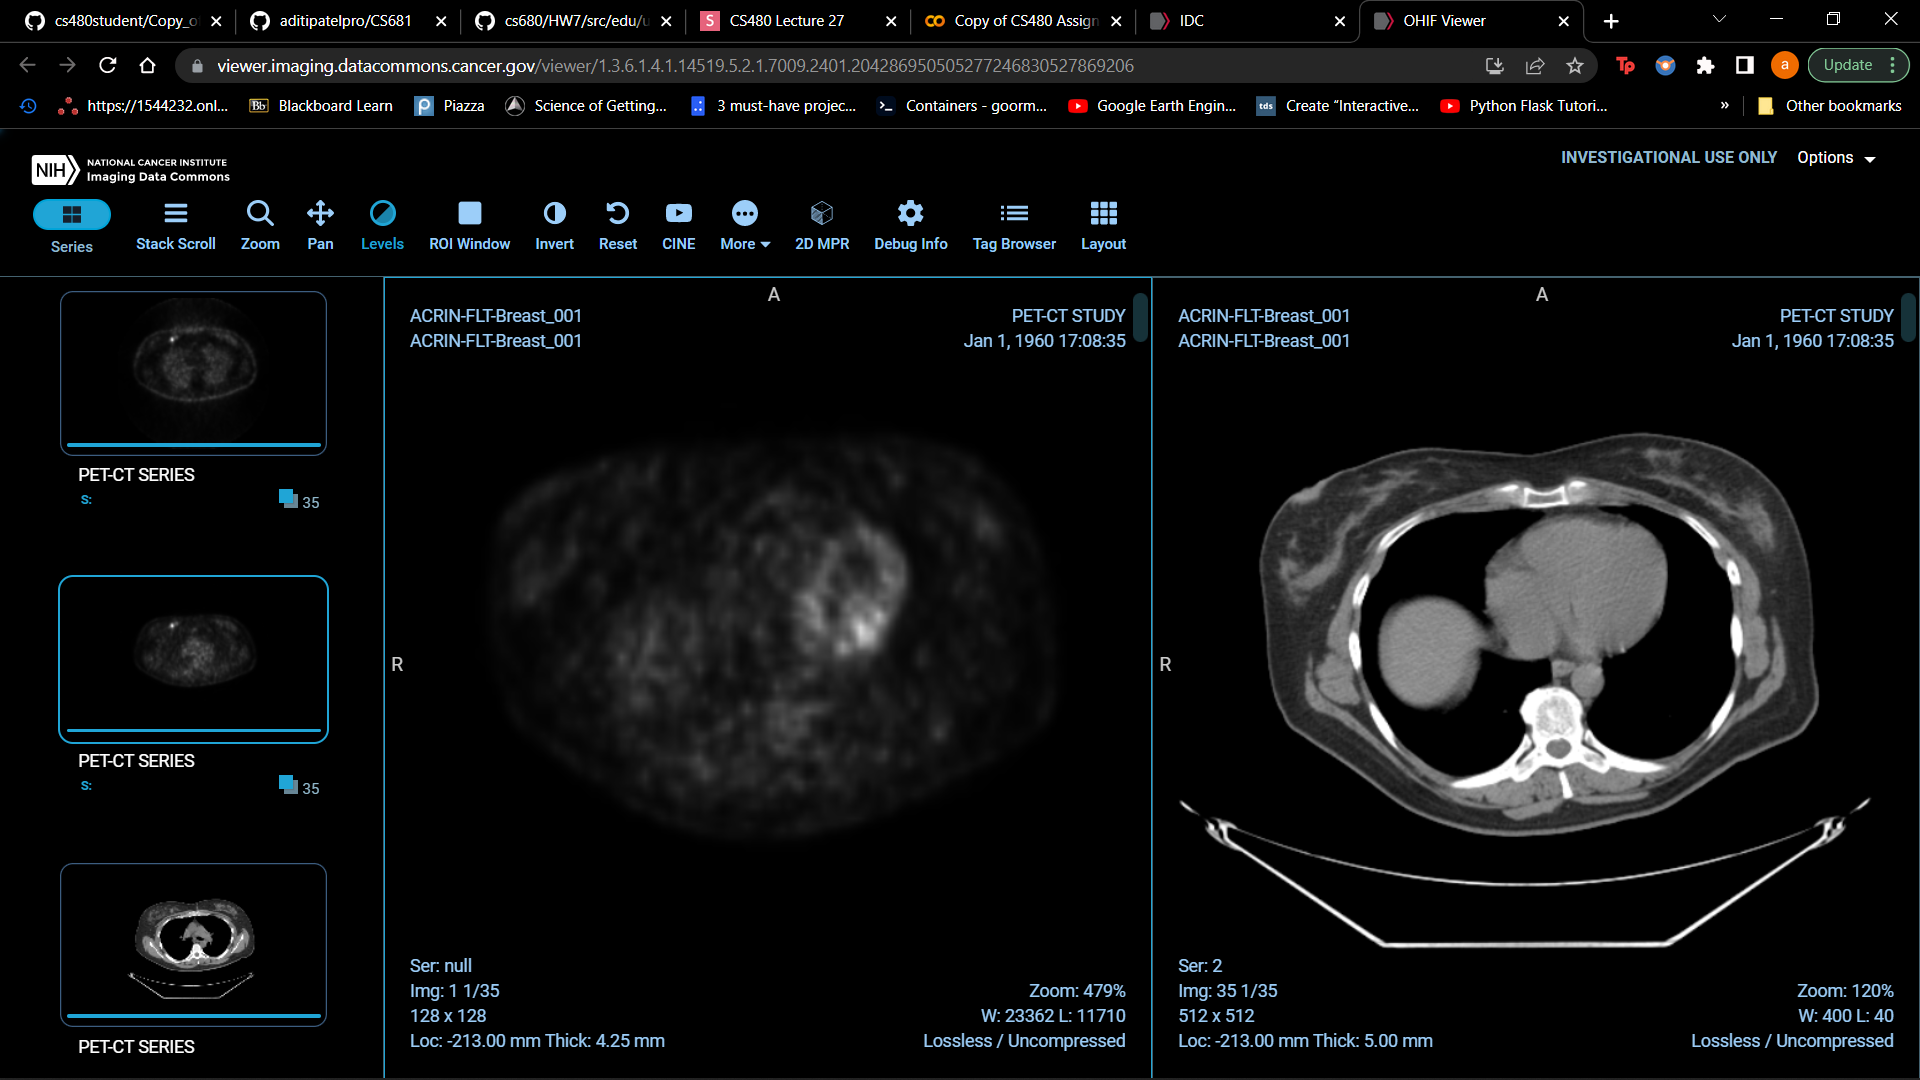

TODO: Add screenshot

**Task 3**: Use an MIP to reslice the PET scan! [35 Points]

In [8]:
# We will now use the 2D MPR functionality to look at the lesion from different
# orientations.
#
# Hint: This works best in Google Chrome.

In [9]:
# Question 1): What is MPR?
#

In [10]:
# TODO: YOUR ANSWER

MPR (multiplanar reformation or reconstruction) is the process of transforming data from an imaging modality obtained in one plane, often axial, into another plane.

In [11]:
# Question 2): What is the difference between MIP, MinIP, AvgIP?
#

In [12]:
# TODO: YOUR ANSWER

1. **Maximum intensity projection (MIP)** is a 3D data technique that projects the voxels with the highest intensity that fall in the path of parallel rays in the display plane. This method tends to display bone and contrast material-filled structures.

2. As opose to MIP, **Minimum internsity projections (MinIP)** projects the voxels with the lowest intensity that fall in the path of parallel rays in the display plane. This method tends to display soft structures like tissue, skin etc.

3. **Average Intensity Projection (AvgIP)** works in the same way as the other modes of intensity projection, but instead of displaying voxels with the highest/lowest attenuation, it displays the average attenuation.

In [13]:
# Now, please navigate to the lesion in all 3 orientations.
#
# TODO: Paste a screenshot below.
#

TODO: Add screenshot

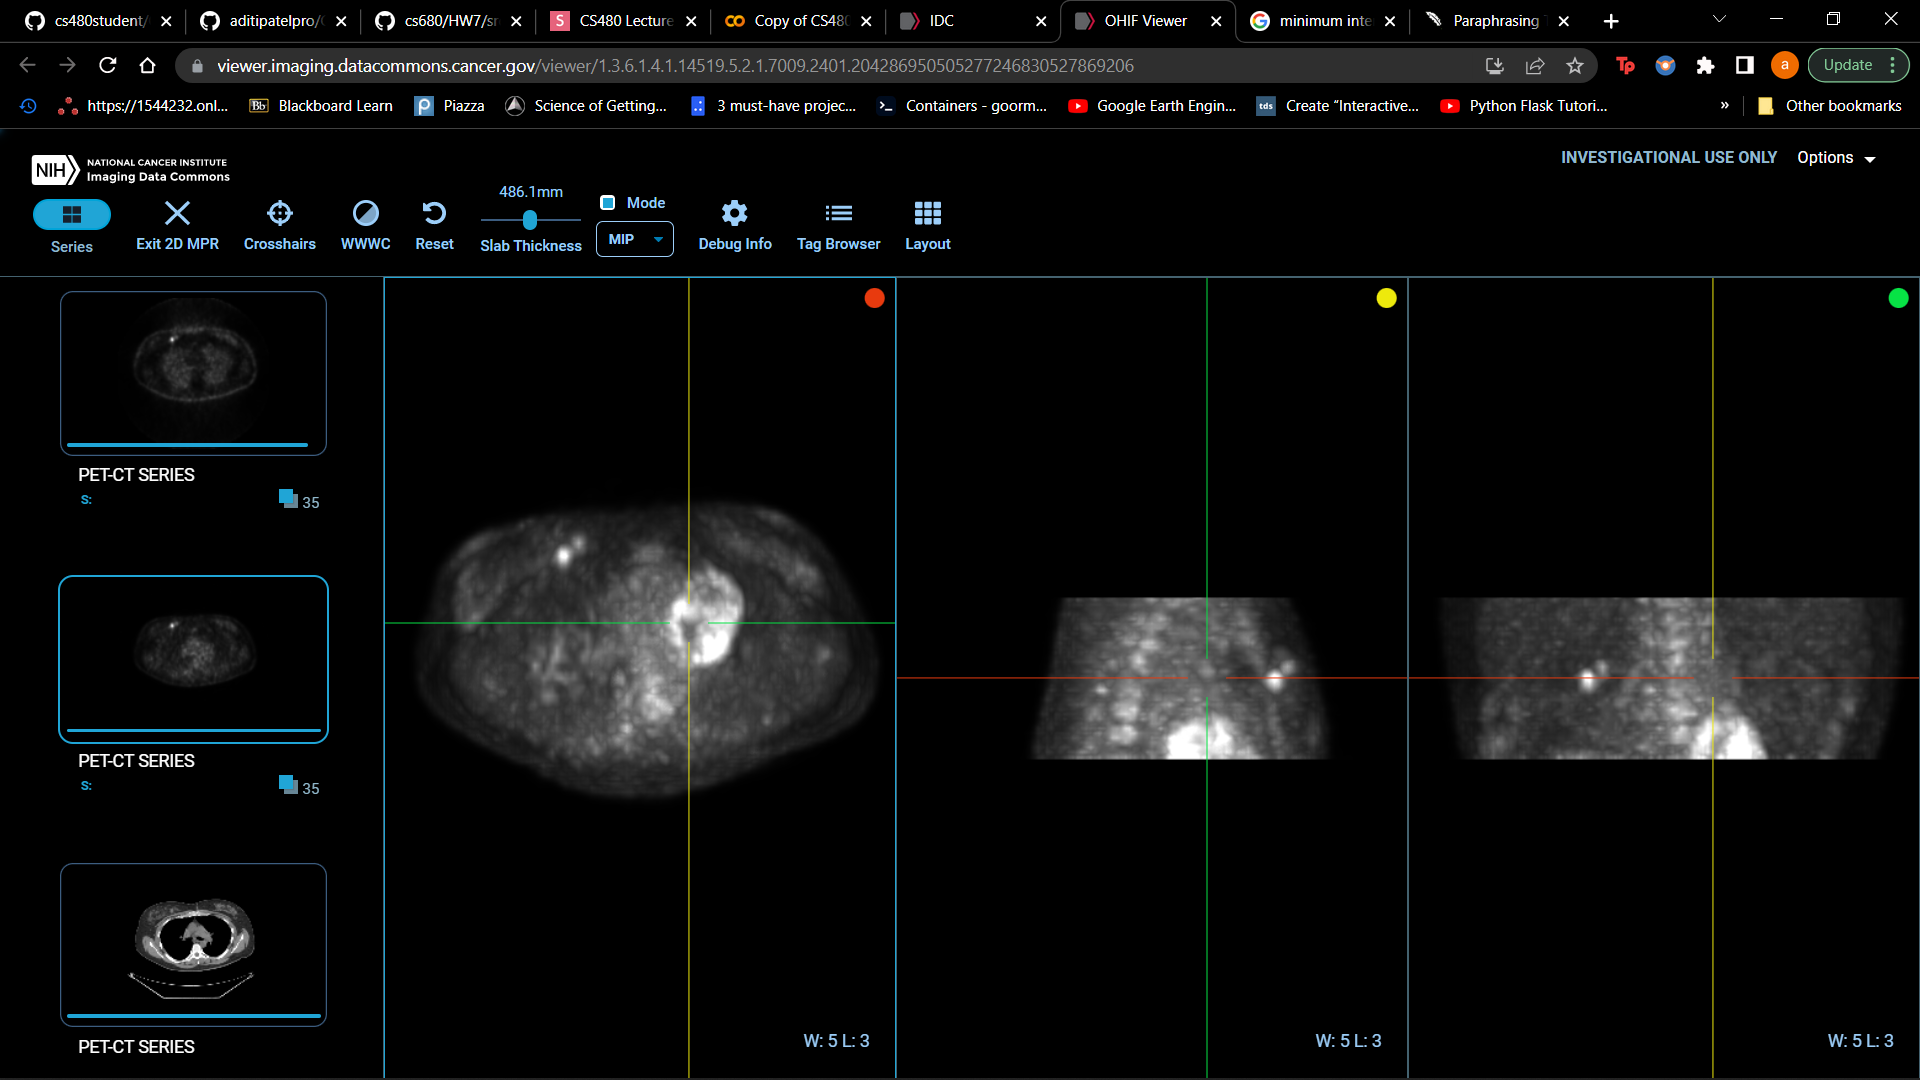

In [14]:
# Question 3): What does the Slab Thickness slider do?
#

In [15]:
# TODO: YOUR ANSWER

As we increase the slab thickness slider, the number of slices increases and they begin to overlap, increasing the total thickness of the eventual slab. As a result, we may view more slices in a single frame.

**Task 4**: Let's access the pixel data! [20 Points]

In [16]:
# Please EXIT THE 2D MPR.
#
# We will now grab the pixel data of the currently displayed slice
# using the Javascript console.
#

In [17]:
# 1) Open the Developer Tools of your browser and access the JS console.
#

In [18]:
# 2) The following code allows to access the pixel data of the slice that
# is currently displayed.
#
# element = cornerstone.getEnabledElements()[0];
# pixels = element.image.getPixelData();
#

In [19]:
# Question 4): What is the maximum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

In [20]:
# TODO: YOUR ANSWER

The maximum pixel value for the current slice is 32767 and the minimum value is 0.

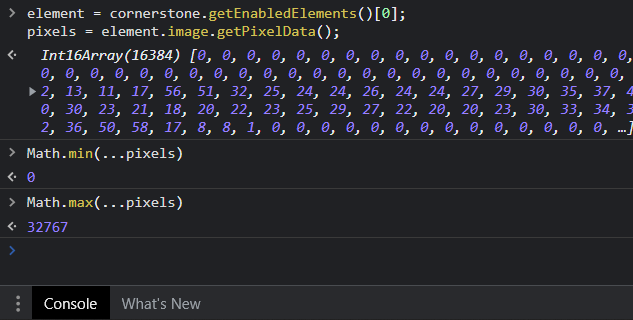

**Bonus**: Apply a filter mask to the current slice! [33 Points]


In [21]:
# Here we will modify the pixel data!
#
# The following code allows you to set the pixels of the current slice.
#
#   pixels.set(new_pixels);
#
# Write code to APPLY A FILTER MASK to the pixels.
#
# Hint: You can use the following code to get the dimensions of the current slice.
#   w = element.image.width;
#   h = element.image.height;
#
# You can decide which filter mask to apply (e.g., Gaussian blur, edge detection..).
#
# ** IMPORTANT **
# Hint 2: Triggering a REDRAW programmatically might be hard but you can use
# the LEVELS tool to manually trigger a redraw to see filtered pixels.
# ** IMPORTANT **

In [22]:
#
#
# TODO: YOUR CODE GOES HERE

# Applied an edge detection filter and the following code is written by Yang RyRay and was refrenced from the following link:
# https://github.com/YangRyRay/cs480student/blob/main/07/Copy_of_CS480_Assignment_7.ipynb
#
# element = cornerstone.getEnabledElements()[0];
# pixels = element.image.getPixelData();

# w = element.image.width;
# h = element.image.height;

# function applyEdgeDetection(pixels,w,h){

#     temp = Array.from(pixels);

#     var pixelArray = [];
#     var maskPixels = new Array(h);

#     for (var i=0; i < maskPixels.length; i++){
#         maskPixels[i]=new Array(w);
#         maskPixels[i].fill(0)
#     }

#     while(temp.length){
#         pixelArray.push(temp.splice(0,w));
#     }

#     for (var i = 1; i < h-1; i++) {
#     for (var j = 1; j < w-1; j++) {
#         var x = 0;
#         var y = 0;

#         var topLeft = pixelArray[i-1][j-1];
#         var midLeft = pixelArray[i][j-1];
#         var bottomLeft = pixelArray[i+1][j-1];

#         var topMid = pixelArray[i-1][j];
#         var midMid = pixelArray[i][j];
#         var bottomMid = pixelArray[i+1][j];

#         var topRight = pixelArray[i-1][j+1];
#         var midRight = pixelArray[i][j+1];
#         var bottomRight = pixelArray[i+1][j+1];

#         x = topLeft + midLeft*2 + bottomLeft - topRight - midRight*2 - bottomRight;
#         y = topLeft + topMid*2 + topRight - bottomLeft - bottomMid*2 - bottomRight;

#         maskPixels[i][j]=Math.abs(x)+Math.abs(y);    
#     }
#     }
#     maskPixels = Array.prototype.concat.apply([], maskPixels);

#     return maskPixels
# };

# mask = applyEdgeDetection(pixels,w,h);
# pixels.set(mask);

In [23]:
# TODO: Please add a screenshot after filtering the current slice.

TODO: ADD SCREENSHOT

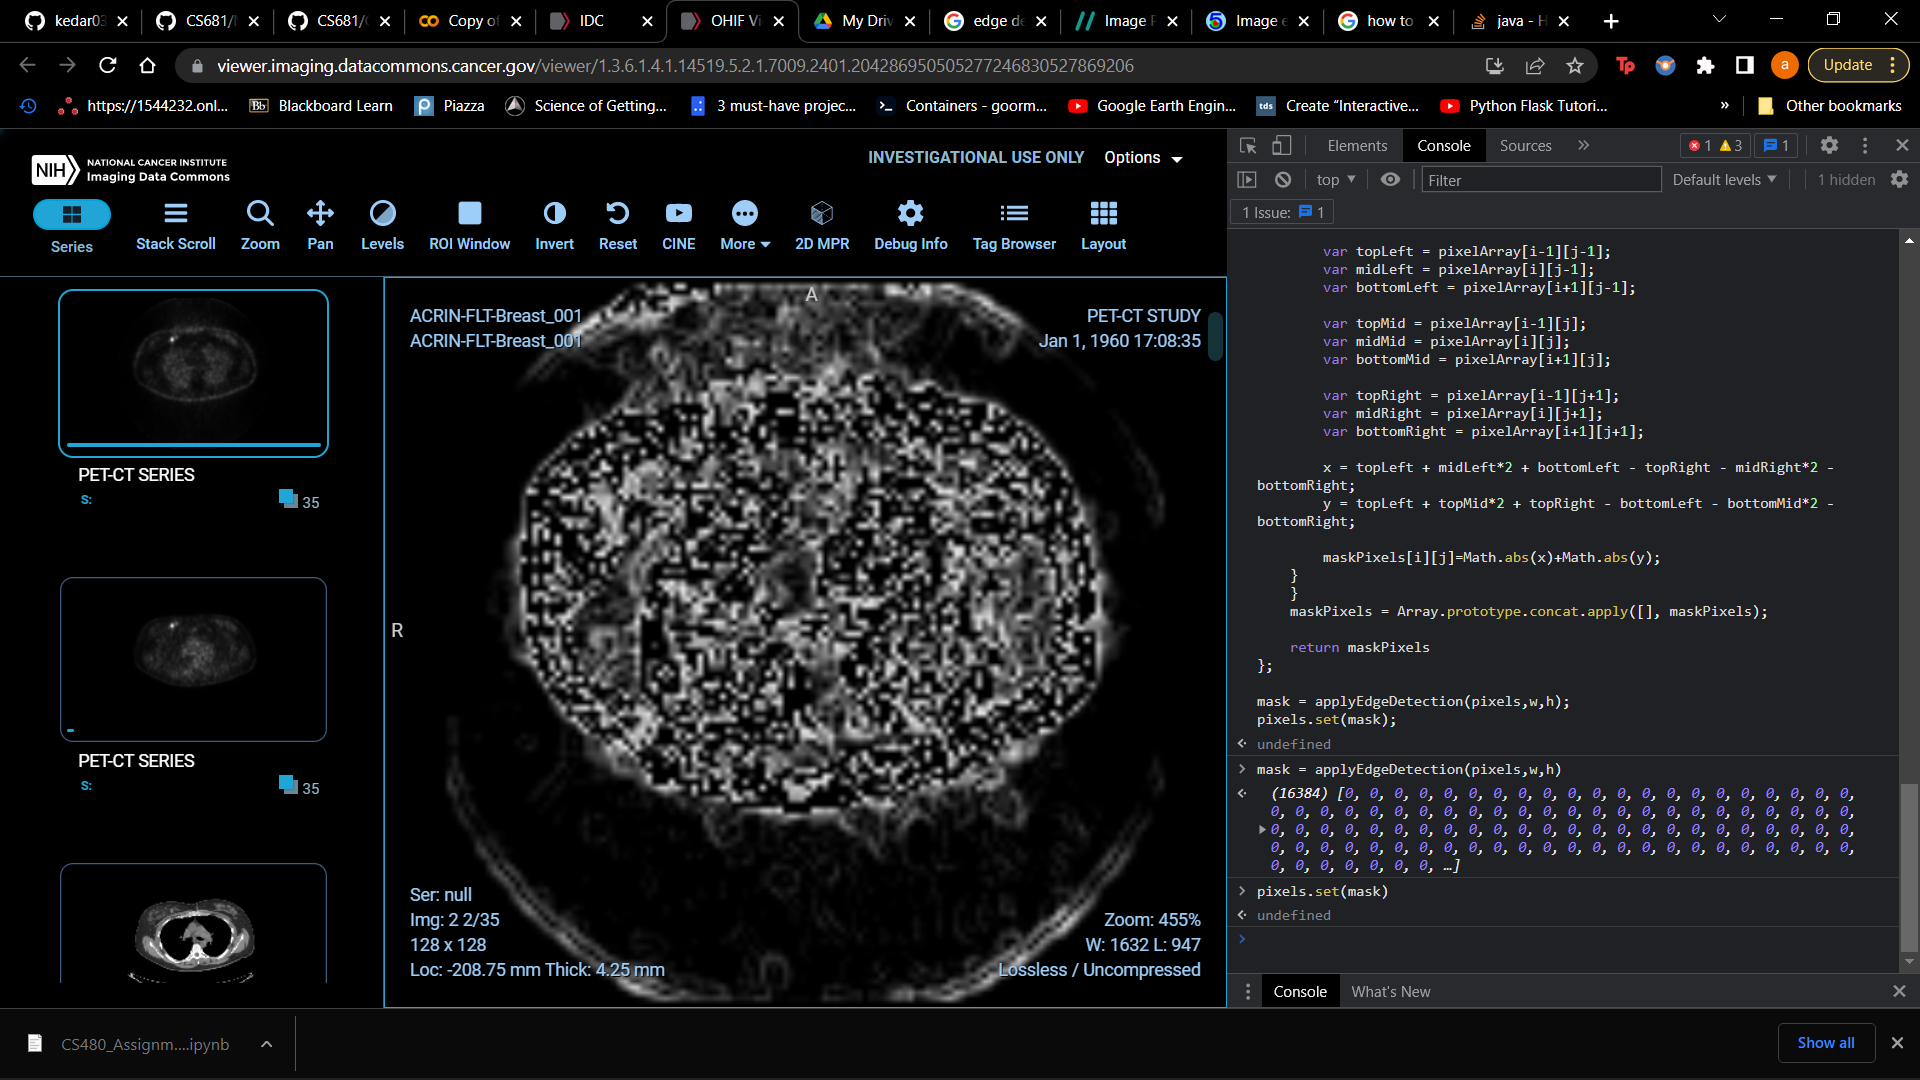

In [24]:
#
# SUPER BONUS (+33 extra): Can you trigger the redraw programmatically?
#

In [25]:
# TODO: YOUR CODE FOR REDRAW GOES HERE

# Refrences:

1. https://github.com/YangRyRay/cs480student/blob/main/07/Copy_of_CS480_Assignment_7.ipynb

2. https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621

# Colaboration:

Ishan Dubey.

In [26]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#